# iris Datasets performing KMeans


In [2]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [8]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.drop(['sepal length (cm)','sepal width (cm)'],axis=1,inplace=True)

In [9]:
df

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


Text(0.5, 0, 'petal width (cm)')

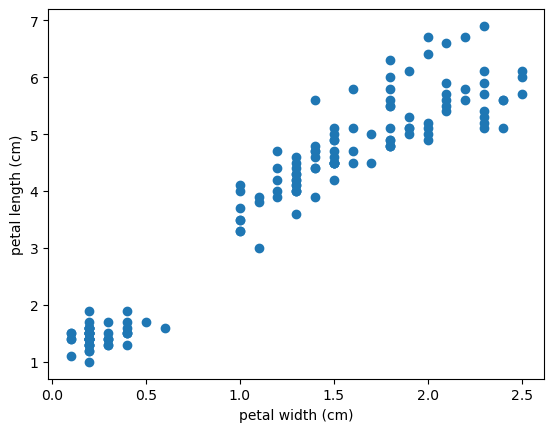

In [16]:
plt.scatter(df['petal width (cm)'],df['petal length (cm)'])
plt.ylabel('petal length (cm)')
plt.xlabel('petal width (cm)')

In [17]:
km = KMeans(n_clusters=2)
km

KMeans(n_clusters=2)

In [19]:
y_predicted = km.fit_predict(df[['petal width (cm)','petal length (cm)']])

In [20]:
df['cluster'] = y_predicted
df

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,1
146,5.0,1.9,1
147,5.2,2.0,1
148,5.4,2.3,1


In [22]:
km.cluster_centers_

array([[0.2627451 , 1.49215686],
       [1.68181818, 4.92525253]])

In [32]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['petal width (cm)','petal length (cm)']])
    sse.append(km.inertia_)

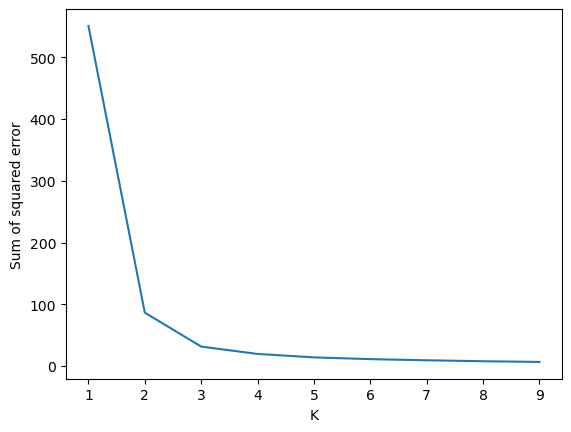

In [33]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

## Preprocessing using min max scaler


In [35]:

scaler = MinMaxScaler()

scaler.fit(df[['petal width (cm)']])
df['petal width (cm)'] = scaler.transform(df[['petal width (cm)']])

scaler.fit(df[['petal length (cm)']])
df['petal length (cm)'] = scaler.transform(df[['petal length (cm)']])


In [36]:
df

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,0
1,0.067797,0.041667,0
2,0.050847,0.041667,0
3,0.084746,0.041667,0
4,0.067797,0.041667,0
...,...,...,...
145,0.711864,0.916667,1
146,0.677966,0.750000,1
147,0.711864,0.791667,1
148,0.745763,0.916667,1


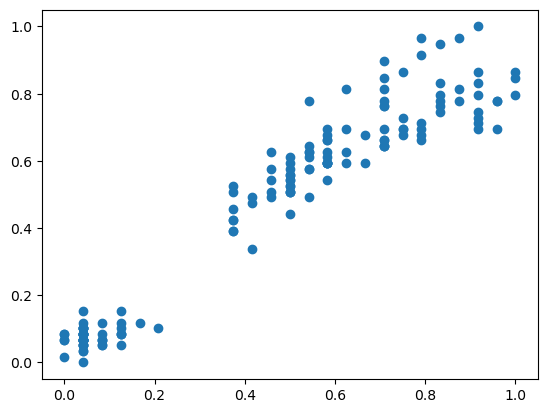

In [37]:
plt.scatter(df['petal width (cm)'],df['petal length (cm)'])

In [41]:
km = KMeans(n_clusters=2)
y_predicted = km.fit_predict(df[['petal width (cm)','petal length (cm)']])
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [42]:
df['cluster']=y_predicted
df.head()

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,0
1,0.067797,0.041667,0
2,0.050847,0.041667,0
3,0.084746,0.041667,0
4,0.067797,0.041667,0


In [43]:
km.cluster_centers_

array([[0.06083333, 0.07830508],
       [0.65666667, 0.6620339 ]])

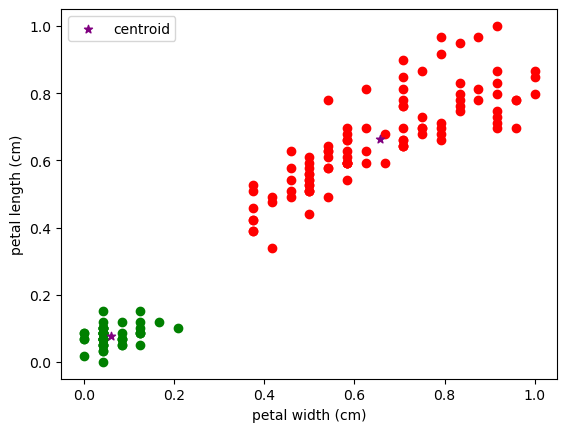

In [44]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
plt.scatter(df1['petal width (cm)'],df1['petal length (cm)'],color='green')
plt.scatter(df2['petal width (cm)'],df2['petal length (cm)'],color='red')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.ylabel('petal length (cm)')
plt.xlabel('petal width (cm)')
plt.legend()